# Fundamentals of Data Visualization using Python - Addendum

## A few extra pieces of useful information on data visualization

Let's first quickly import the necessary libraries from the main session.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Error bars

Error bars are very critical for most experimental data where the variance in the data might be useful to show. 

Let's look at an example where the data is generated using a random number generator.

In [66]:
x = np.linspace(0, 3, 20)  # generating 20 linearly spaced points between 0 and 1
y = np.sin(2*x)  
# generating a normal random variable with mean = y, standard deviation = 0.5, and size = size of x
err = np.random.normal(loc=y, scale=0.5, size=len(x))  

Now, let's plot this data. The first three arguments are required and are in the following order: x-data, y-data, error-data. I have used several keywords after the first three below to change the default look of the visual. For more keyword options take a look at the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html). I would recommend that you explore adding and removing some of the optional keywords to get more familiar.

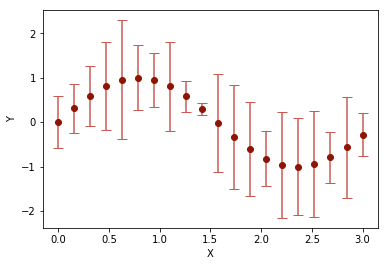

In [82]:
plt.errorbar(x, y, err, marker='o', linestyle='', 
             markerfacecolor='xkcd:brick red', markeredgecolor='xkcd:brick red',
             ecolor='xkcd:dark salmon', capsize=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Error bars are useful when you have few points. If you have a lot of data points or smooth data you might want to show the errors as upper and lower bounds. There are many ways to implement bounds. The example below shows one way how you might achieve bounds using the function `fill_between` from `pyplot`.

In [83]:
# Generating smoothly varying data
x = np.linspace(0, 3, 200)
y = np.sin(2*x)  
err = np.sin(0.5 * x)

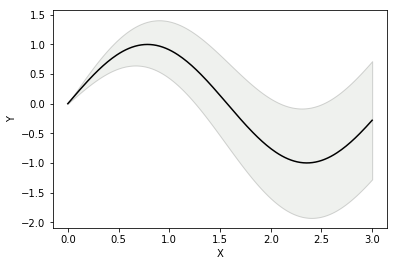

In [88]:
plt.plot(x, y, color='xkcd:black')
plt.fill_between(x, y-err, y+err, 
                 facecolor='xkcd:light grey', edgecolor='xkcd:grey', alpha=0.4,)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Geospatial data

Python has some libraries that are very useful for working with geographical data. One of the most popular is `Geopandas`, which is based on another library called `Shapely`. 

Let's first start with installing and importing the libraries. The following two cells will install `Geopandas`, which should only take a few seconds and import it for use in this notebook, respectively. 

By the way, note that if you are running a notebook on Google Colab, the libraries you install disappear when you shut down the notebook. When you start the notebook again, you have to install them again.

In [89]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install geopandas

In [3]:
import geopandas as gpd

The following code loads a map of the world and plots it.

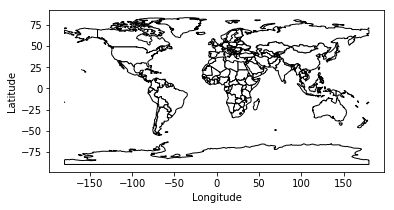

In [23]:
# Obtain map dataset from the library
path = gpd.datasets.get_path('naturalearth_lowres')
# Read the dataset
world = gpd.read_file(path)
# Plot 
world.plot(color='white', edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The data set contains maps of all countries, so you can also get just the country you want or also plot an entire continent. Here's a version that just plots North America and one that just plots the USA.

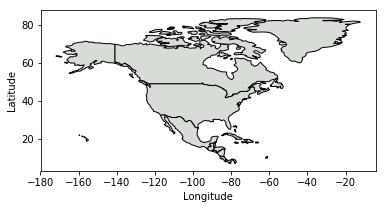

In [24]:
# Generate a boolean subset of the dataset
north_america = world.continent == 'North America'
# Filter out data only for the subset
north_america_map = world[north_america]
# plot
north_america_map.plot(color='xkcd:light grey', edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

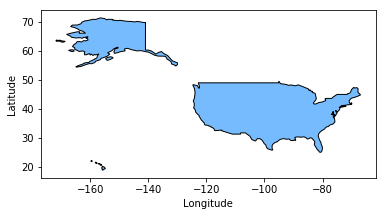

In [25]:
usa = world.name == 'United States of America'
usa_map = world[usa]
usa_map.plot(color='xkcd:sky blue', edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

To overlap the maps with additional data requires more advanced programming. We will look at two examples; adding points to the map and creating maps where the color of the map depends on certain quantities (*aka* Choropleth maps).

The `Geopandas` library also contains geographic locations of the worlds capitol cities. Let's see how we can add these to the map of the world. 

The following cell reads in the data about the capitol cities.

In [26]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

Let's try the obvious, *i.e.* use the `plot` method for the cities data right after the world data and see what happens.

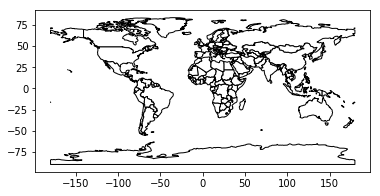

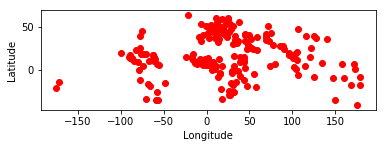

In [27]:
world.plot(color='white', edgecolor='black')
cities.plot(color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This clearly did not work! `GeoPandas` puts the two plots on different axes, which is not what we want in this case.
To get the points and the map on the same axes, we have to use a function from `Matplotlib` that returns the axis of the current figure (this function is called `gca` for *get current axis*) and then we can input this axis to the `plot` method to inform it where it should be adding the plots. While we are making this modification, let's also use the `figure` function to change the size of the visual. 

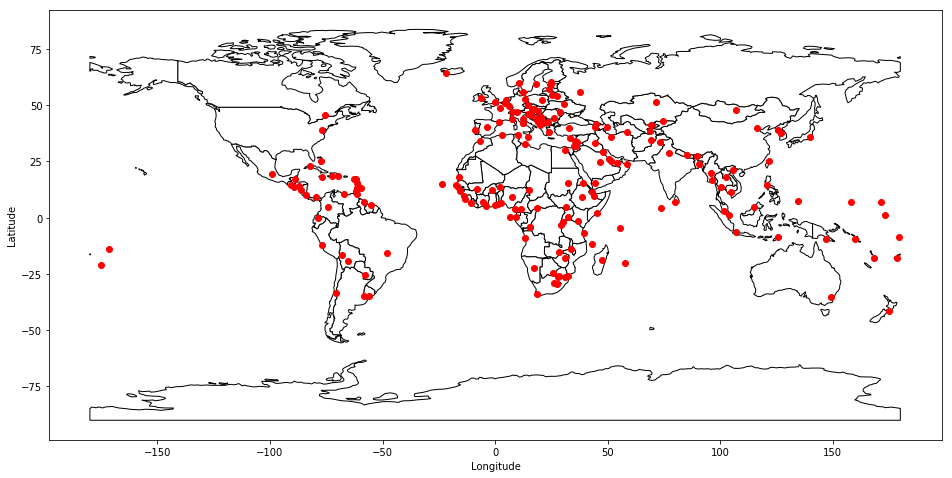

In [28]:
plt.figure(figsize=(16, 16))  # change figure size
ax = plt.gca()  # get current axis
world.plot(color='white', edgecolor='black', ax=ax)  # plot world map on current axis
cities.plot(ax=ax, color='red')  # plot cities on current axis
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()  # show plot

The dataset that we imported into the variable `world` contains some more information. We can use the `head` function to quick check what the data looks like.

In [29]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Notice that we have a variable called `pop_est`, which is an estimate of the population of the country. Let's create a visual where we color each country depending on the value of the `pop_est` variable. 

All we have to do is to provide this data to the `column` keyword in the `plot` method. If you have some data that is external, as long as you can put the data into a `pandas` series or a `numpy` array, you can use it in the `column` keyword as an argument. 

Here is [link](https://geopandas.org/reference.html#geopandas.GeoDataFrame.plot) to the documentation for the `plot` method for more information.

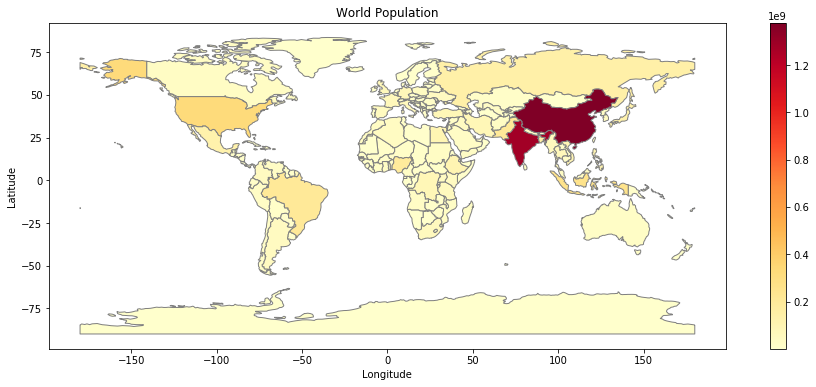

In [48]:
plt.figure(figsize=(16, 6))
ax2 = plt.gca()
world.plot(column='pop_est', ax=ax2, legend=True, cmap='YlOrRd', edgecolor='grey')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('World Population')
plt.show()

For plotting a scatter plot, or heatmap overlayed on top of a map there is another useful library called `basecamp`. Use [this link](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.13-Geographic-Data-With-Basemap.ipynb) to look at some tutorials for using `basecamp`. 

Side note: The previous link is from a book called [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) that has some very nice tutorials and examples. 

## Other useful bits and pieces

There were a few other topics that you all were interested in: interactive elements, agent-based models, plots based on real-time data pulled from the internet. 

Covering all of these topics starting from scratch would need a lot more time. Another complication with providing you examples of interactive elements and agent-based simulations is that the interactive elements and updating plots in for loops do not work in the Google Colab environment. So, I am provinding links to some examples I have that uses interactive elements to run agent-based simulations, however, to run these would require you to download the notebooks and execute locally.

***Interactive elements + Agent-based simulations***

Adding interactive elements to visualization can be very powerful if done well. The common use cases of interactive data visualizations are when presenting data on a webpage, or when sharing a simulation where you want the user to be able to change parameters and see updated results. 

Agent-based simulations are a type of simulation where one has individual "agents" that interact with other agents with a given set of rules. I am sure you all must have seen [this article](https://www.washingtonpost.com/graphics/2020/world/corona-simulator/) in the Washington Post. The visualizations presented in it are results of a classic type of agent-based simulation. 

The links below are some examples:
1. [Simulation of Active Matter](https://github.com/nishantsule/Active-Matter-Simulation/blob/master/Vicsek2D.ipynb) – Active matter is a technical term used to denote a lerge number of agents that consume energy to move about and interact. Some examples include flocking birds like starlings, schools of fish. The example in the link simulates flocking behavior using a very simple rule: every agent moves in the same direction (or close to the same direction) as that of its nearest neighbors. The simulation allows you control the number of agents and the noise in the system using interactive elements and then the simulation run and displays the behavior of the agents in time.
2. [Simulation of Brownian Particle](https://github.com/nishantsule/Langevin-Dynamics/blob/master/Ensemble_LangevinDynamics2D.ipynb) – This example simulates Brownian motion, the behavior of microscopic particles in a fluid. The interactive elements allow you to change the properties of the fluid and the particles. 
3. [Jam absorption driving](https://github.com/nishantsule/Jam-Absorption-Driving/blob/master/JAD_simulation_p2.ipynb) – This example does not have interactive elements, but uses the library `Bokeh` which is very useful for creating interactive data visuals and with streaming data. Jam absorption driving is an idea for avoiding traffic jams using a self-driving car to absorb the accelerations and decelerations of individuals driving on a highway. 

***Visualizing data updating in real time***
For creating visuals that update in time, `Holoviews` is a very useful library. It is based on `Bokeh` and adds much more capabilities. At this point I can only point you to [tutorials](http://holoviews.org/user_guide/Streaming_Data.html) in its documentation, but perhaps at some later stage I could run a workshop on this or provide you with a more structured notebook.
